#Segundo Parcial - Pregunta 2 - APRENDIZAJE NO SUPERVISADO
##Nombre: Jhamil Crespo Rejas
##Carrera: Ingenieria en Ciencias de la Computacion


##Importacion de Librerias

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os # modulo para interactuar con el sistema operativo (lextura y escritura de archivos)
import numpy as np #Cálculo científico y vectorial para python
import pandas as pd #para la manipulacion y analisis de datos
from sklearn.model_selection import train_test_split # para dividir conjuntos de datos en entrenamiento y prueba
from sklearn.preprocessing import OrdinalEncoder #para codificar variables categoricas como numeros enteros
import matplotlib.pyplot as plt #para la creacion de graficos y visualizaciones
from sklearn.cluster import KMeans #para realizar el clustering para el aprendizaje no supervisado
from sklearn.metrics import silhouette_score


##Preprocesamiento del Dataset

En este conjunto de datos, puedes encontrar los 200 mejores juegos en Twitch cada mes desde 2016 hasta el 2023. Segun la descripcion del dataset toda la información fue tomada de sullygnome.com, un sitio de análisis y estadísticas de Twitch.

Con esta informacion podemos estimar en que posicion se encontrara un juego en base a sus estadisticas

Link del dataset:
https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch?select=Twitch_game_data.csv


In [ ]:
#Lectura del dataset
url = "/content/gdrive/MyDrive/Segundo Parcial - IA/Pregunta2/Twitch_game_data.csv"
dataframe = pd.read_csv(url, encoding='ISO-8859-1')

print(dataframe)

       Rank                              Game  Month  Year  Hours_watched  \
0         1                 League of Legends      1  2016       94377226   
1         2  Counter-Strike: Global Offensive      1  2016       47832863   
2         3                            Dota 2      1  2016       45185893   
3         4                       Hearthstone      1  2016       39936159   
4         5       Call of Duty: Black Ops III      1  2016       16153057   
...     ...                               ...    ...   ...            ...   
18595   196                          PlateUp!      9  2023         560064   
18596   197                       PokÃ©mon GO      9  2023         551596   
18597   198                       Bloons TD 6      9  2023         540735   
18598   199                   Ragnarok Online      9  2023         533644   
18599   200                        Bloodborne      9  2023         530610   

       Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers 

In [ ]:
#Quitamos la columna 'game' ya que el nombre del juego no es muy relevante
dataframe.drop('Game', axis=1, inplace=True)

In [ ]:
#eliminamos las filas con valores nulos
dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

Rank                0
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64


,Rank,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,18600.000000,18600.000000,18600.000000,1.860000e+04,1.860000e+04,1.860000e+04,18600.000000,1.860000e+04,18600.000000,18600.000000,18600.000000
mean,100.500000,6.354839,2019.387097,5.570829e+06,1.797605e+05,6.228739e+04,658.638387,2.184601e+04,7641.466505,246.107634,75.470928
std,57.735857,3.406743,2.238686,1.885594e+07,5.578888e+05,1.496745e+05,2632.524422,6.507139e+04,25872.149790,765.147334,328.909901
min,1.000000,1.000000,2016.000000,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000
25%,50.750000,3.000000,2017.000000,4.705542e+05,1.480725e+04,9.548750e+03,61.000000,1.796750e+03,645.000000,20.000000,16.240000
50%,100.500000,6.000000,2019.000000,9.982500e+05,3.865150e+04,2.273850e+04,146.000000,5.006000e+03,1370.000000,52.000000,29.300000
75%,150.250000,9.000000,2021.000000,2.804888e+06,1.031208e+05,5.280825e+04,370.000000,1.327775e+04,3852.000000,141.000000,57.312500
max,200.000000,12.000000,2023.000000,3.445520e+08,1.024570e+07,3.462517e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000


In [ ]:
# Verificar el resultado
print(dataframe)

       Rank  Month  Year  Hours_watched  Hours_streamed  Peak_viewers  \
0         1      1  2016       94377226         1362044        530270   
1         2      1  2016       47832863          830105        372654   
2         3      1  2016       45185893          433397        315083   
3         4      1  2016       39936159          235903        131357   
4         5      1  2016       16153057         1151578         71639   
...     ...    ...   ...            ...             ...           ...   
18595   196      9  2023         560064           18617         16476   
18596   197      9  2023         551596           16578          3001   
18597   198      9  2023         540735           20142         10320   
18598   199      9  2023         533644           27014         11508   
18599   200      9  2023         530610           36741         10300   

       Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  
0               2903     129172       127021

Dividimos el dataframe en dos conjuntos, las caracteristicas y las etiquetas

In [ ]:
y = dataframe['Rank']
X = dataframe.drop(columns=['Rank'])

Observamos cuantas clases hay en Y

In [ ]:
labels = y.unique()

#Mostramos la lista de valores unicos y la cantidad de estos
print(labels)
print(len(labels))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
200


In [ ]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Observamos la cantidad de ejemplos que quedaron para entrenamiento y para prueba

In [ ]:
print(len(X_train))
#print(len(y_train))
print(len(X_test))
#print(len(y_test))

14880
3720


##Clustering

###Analisis para escoger la mejor cantidad de grupos para realizar el clustering

Creamos 9 modelos K-means con diferentes cantidades de clusters (1 - 9) para encontrar el numero de clusters adecuado.

Este analisis lo hacemos en base a el coeficiente de silueta de los modelos que es un indicativo de cuan bien agrupados estan los datos. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Para este caso solo probamos para hasta 10 clusters, ya que verificar para hasta 50, 100, 200 grupos tardaba mucho en ejecutar y el coeficiente de silueta iba bajando

Para el primer grafico utilizamos el coeficiente de silueta de todo el modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

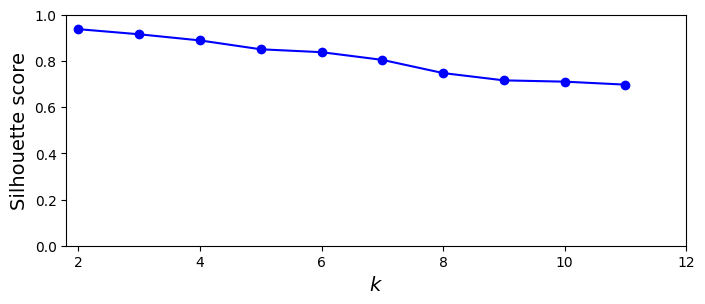

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(X_train)
                for k in range(1, 12)] #se crea una lista de modelos k-means, uno por cada numero de clusters (1-9)

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]] #se calculan los puntajes de silueta para todos los modelos

plt.figure(figsize=(8, 3)) #se crea una figura de 8x3 pulgadas
plt.plot(range(2, 12), silhouette_scores, "bo-") #se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 12.0, 0.0, 1.0]) #se establece el rago para el eje x y el eje y
plt.show()

Para el segundo grafico utilizamos el coeficiente de silueta de cada cluster en los modelos, eso nos ayuda a ver que tan equilibrados y estables estan los agrupamientos en los clusters de los modelos.

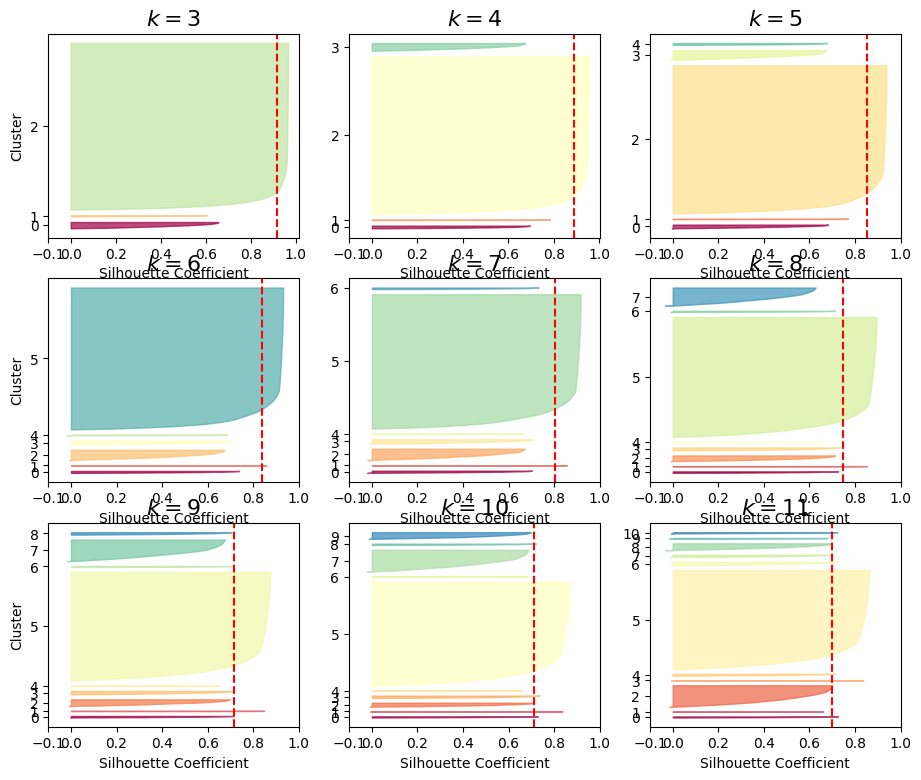

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))#crea una figura de 11x9 pulgadas

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in (3, 4, 5, 6, 7, 8, 9, 10, 11): #se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1) #crea un subgrafico para cada uno

    y_pred = kmeans_per_k[k - 1].labels_#se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(X_train, y_pred)#se calculan los coeficientes de las siluetas para cada muestra

    padding = len(X_train) // 30 #se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = [] #cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] #se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort() #se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)#se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)#se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)#se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding #se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (3,4,5,6,7, 8, 9, 10, 11):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")#se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Segun el analisis de las graficas, identificamos que el modelo con 10 clusters es el mas adecuado ya es que parece tener mas equilibrado los coeficientes de silueta de sus clusters.

##Aprendizaje Semi-Supervizado

Para el aprendizaje semi-supervizado primero creamos un modelo de K-means para 1000 clusters y ajustamos los datos en base a esos grupos.

In [ ]:
from sklearn.cluster import KMeans

k = 50 #establece el numero de clusters (grupos)
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Una vez realizado el clustering, obtenemos los ejemplos mas representativos para cada uno de los clusters ademas de sus respectivas etiquetas verdaderas.

In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train.values[idxs]#devuleve las muestras mas representativas por cada columna

In [ ]:
representative_labels = kmeans.predict(X_representative_digits)
print(representative_labels)#mostramos el numero de cluster correspondiente a cada ejemplo mas representativo

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Realizamos la clasificacion manual para esos ejemplos mas representativos

In [ ]:
y_representative_digits = y_train.values[idxs]#identifica los labels correspondientes a las muestras mas representativas
print(y_representative_digits)

[110   3   4   2  16   2  34   7   2   6   7   4   1  27  74  13 199   4
   2   5  55   2   4   1   5  11   1   2  28  20  16   7   1   3   4  46
   1   6   1   2   3   4   8 126 162  21  11  47  13   1]


Para hacer la etiquetacion manual me guie de las etiquetas reales, sin embargo como estoy tomando solo 10 grupos y no 200 (como es el caso de las Y reales)n necesito asignar valores a ciertos rangos. Entonces por ejemplo, si se el valor real de la etiqueta esta entre 1 y 20, se lo reetiquetara como 1.

Siguiendo esa logica:

* 1-20 -> 1
* 21-40 -> 2
* 41-60 -> 3
* 61-80 -> 4
* 81-100 -> 5
* 101-120 -> 6
* 121-140 -> 7
* 141-160 -> 8
* 161-180 -> 9
* 181-200 -> 10

Se realiza la etiquetacion manual


In [ ]:
etiquetasAMano = [6,1,1,1,1,1,2,1,1,1,1,1,1,2,4,1,10,1,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,1,1,1,7,9,2,1,3,1,1]
y_representative_digits = np.array(etiquetasAMano)#se reemplaza las etiquetas
print(etiquetasAMano)

[6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 10, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 7, 9, 2, 1, 3, 1, 1]


Se realiza una prueba de entrenamiento de un modelo de regresion logistica con one vs all con los datos mas representativos y se hace una prueba de precision.

Primero necesitamos poner los valores de y_test en los valores equivalentes ya establecidos arriba

In [ ]:
# Definimos los intervalos y las etiquetas
bins = np.arange(0, 201, 20)
labels = np.arange(1, 11)

# Convertimos y_test a un DataFrame de pandas
y_test_df = pd.DataFrame(y_test)

# Aplicamos la función pd.cut() para dividir los valores en intervalos
y_test_df['new_values'] = pd.cut(y_test_df.values.flatten(), bins=bins, labels=labels)

# Convertimos los nuevos valores a enteros
y_test = y_test_df['new_values'].astype(int).values

print(y_test)


[2 5 9 ... 6 4 8]


In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea un modelo de regresion logistica con one vs all
%time log_reg2.fit(X_representative_digits, y_representative_digits)#entrena un modelo con los datos y labels representativos
log_reg2.score(X_test, y_test)#muestra la presicion del modelo

CPU times: user 173 ms, sys: 4.62 ms, total: 177 ms
Wall time: 219 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.210752688172043

In [ ]:
# Definimos los intervalos y las etiquetas
bins = np.arange(0, 201, 20)
labels = np.arange(1, 11)

# Convertimos y_test a un DataFrame de pandas
y_train_df = pd.DataFrame(y_train)

# Aplicamos la función pd.cut() para dividir los valores en intervalos
y_train_df['new_values'] = pd.cut(y_train_df.values.flatten(), bins=bins, labels=labels)

# Convertimos los nuevos valores a enteros
y_train = y_train_df['new_values'].astype(int).values

print(y_train)


[ 5  5  4 ... 10  9  2]


In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea otro modelo de regresion logistica con one vs all
%time log_reg.fit(X_train, y_train)#entrena el modelo con los datos y labels correspondientes reales
log_reg.score(X_test, y_test)

CPU times: user 1.4 s, sys: 1.2 s, total: 2.61 s
Wall time: 2.31 s


0.2295698924731183

Segun las etiquetas mas representativas ya clasificadas manualmente hacemos una proparagacion en base a su etiqueta a todos los demas ejemplos de sus clusters.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]#se asigna la etiqueta representativa a todas las muestras que pertenecen al cluster i

Luego entrenamos otro modelo con esas etiquetas propagadas y vemos su presicion

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea el tercer modelo de regresion logistica con one vs all
%time log_reg3.fit(X_train, y_train_propagated)#entrena el modelo con 1000 datos de entrenamiento y sus Y's correspondientes pero ya modifcadas en base a las y representativas
log_reg3.score(X_test, y_test)#calcula la presicion del modelo

CPU times: user 1.9 s, sys: 1.46 s, total: 3.36 s
Wall time: 2.84 s


0.21908602150537634

##Aprendizaje Activo

Identificamos las muestras con las que el modelo tiene más dificultades para clasificar correctamente

In [ ]:
probas = log_reg3.predict_proba(X_train)#se obtienen las probabilidades de que las muestras que pertenezcan a cada clase posible
labels_ixs = np.argmax(probas, axis=1)#obtiene el indice de la probabilidad maxima (la clase mas probable) por cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])#se obtiene la probabilidad maxima de cada muestra
sorted_ixs = np.argsort(labels) #se ordenan los indices de las muestras por sus probabilidades en orden ascendente(las primeras seran las entradas con menores probabilidades maximas)
labels[sorted_ixs[:10]]#se muestran las 10 muestras con las menores probabilidades maximas

array([0.22243537, 0.22447386, 0.22503071, 0.22543874, 0.22603457,
       0.22676575, 0.22826788, 0.22836148, 0.22893791, 0.22966039])

In [ ]:
y_lowest = y_train[:][sorted_ixs[:k]] #obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente
y_lowest

array([8, 8, 6, 8, 8, 8, 6, 8, 7, 7, 4, 3, 6, 3, 8, 6, 3, 4, 4, 7, 7, 7,
       8, 8, 8, 4, 4, 6, 7, 9, 7, 6, 4, 9, 6, 8, 4, 3, 6, 7, 3, 6, 6, 8,
       7, 7, 4, 6, 7, 6])

In [ ]:
y_train2 = y_train_propagated.copy()#copia las filas de las y propagadas
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 1.71 s, sys: 1.01 s, total: 2.72 s
Wall time: 1.46 s


0.22043010752688172